In [1]:
!pip install matplotlib


In [64]:
!pip install tensorflow


In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

In [2]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


In [3]:
img_height, img_width = (64,64)
batch_size=32
train_data_dir = r"D:\Research-Final\Dataset-practical security analysis\images\Dataset\Train"
test_data_dir = r"D:\Research-Final\Dataset-practical security analysis\images\Dataset\Test"
val_data_dir = r"D:\Research-Final\Dataset-practical security analysis\images\Dataset\Val"



In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,validation_split=0.4)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
valid_generator = train_datagen.flow_from_directory(val_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 80299 images belonging to 2 classes.
Found 18605 images belonging to 2 classes.


In [5]:
test_generator = train_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=1, class_mode='categorical', subset='validation')

Found 18639 images belonging to 2 classes.


In [7]:
!pip install Scipy


Defaulting to user installation because normal site-packages is not writeable


In [6]:
import scipy


In [7]:
x,y = next(test_generator)
x.shape

(1, 64, 64, 3)

In [8]:
train_generator.num_classes

2

In [10]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = True
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=20)

Epoch 1/20
2510/2510 [==============================] - 3900s 2s/step - loss: 0.3427 - accuracy: 0.8629
Epoch 2/20
2510/2510 [==============================] - 3593s 1s/step - loss: 0.2673 - accuracy: 0.8913
Epoch 3/20
2510/2510 [==============================] - 3644s 1s/step - loss: 0.2381 - accuracy: 0.9048
Epoch 4/20
2510/2510 [==============================] - 3725s 1s/step - loss: 0.2230 - accuracy: 0.9119
Epoch 5/20
2510/2510 [==============================] - 3621s 1s/step - loss: 0.1892 - accuracy: 0.9269
Epoch 6/20
2510/2510 [==============================] - 3609s 1s/step - loss: 0.1720 - accuracy: 0.9339
Epoch 7/20
2510/2510 [==============================] - 3526s 1s/step - loss: 0.1540 - accuracy: 0.9419
Epoch 8/20
2510/2510 [==============================] - 3599s 1s/step - loss: 0.1428 - accuracy: 0.9464
Epoch 9/20
2510/2510 [==============================] - 4013s 2s/step - loss: 0.1263 - accuracy: 0.9532
Epoch 10/20
2510/2510 [==============================] - 4091s 2

In [11]:
model.save('D:\Research-Final\Output.keras')

In [1]:
model.save('D:\Research-Final\Output.h5')

NameError: name 'model' is not defined

In [12]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nResults', test_acc)

18639/18639 - 1003s - loss: 0.3009 - accuracy: 0.9221 - 1003s/epoch - 54ms/step

Results 0.9220988154411316


In [13]:
#Confusion Matrix

1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 81ms/step


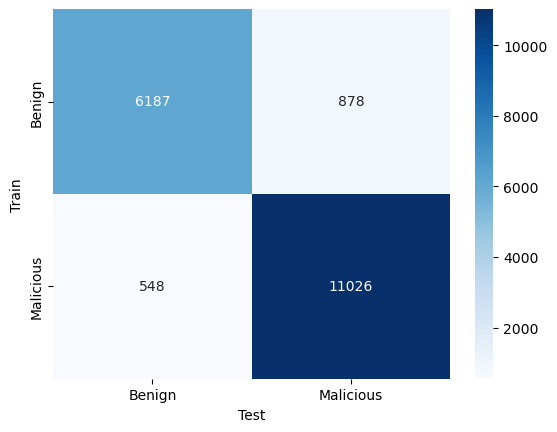

In [14]:
import pandas as pd
import seaborn as sb
model = tensorflow.keras.models.load_model('D:\Research-Final\Output.keras')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for i in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['Test','Train'])
confusion_matrix = pd.crosstab(out_df['Train'],out_df['Test'], rownames=['Train'], colnames=['Test'])

sb.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()

In [15]:
print('accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

accuracy: 92.34937496646816


In [16]:
from sklearn.metrics import f1_score

# assume y_true and y_pred are the true and predicted labels, respectively
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1]

f1_score = f1_score(y_true, y_pred, average='binary')

print("F1 score for the model: {:.2f}".format(f1_score))

F1 score for the model: 0.86


In [7]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.9/38.6 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 1.4/38.6 MB 9.2 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/38.6 MB 10.2 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/38.6 MB 11.1 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.6 MB 11.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.6 MB 12.1 MB/s eta 0:00:03
   ----- ---------

In [14]:
pip install opencv-contrib-python


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/aa/2e/576ac47f21d555b459ca837bb3fb937e50339b8fbfd294945ea2f5290416/opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB 1.3 MB/s eta 0:00:36
    --------------------------------------- 0.6/45.3 MB 7.2 MB/s eta 0:00:07
   - -------------------------------------- 1.3/45.3 MB 10.2 MB/s eta 0:00:05
   - -------------------------------------- 2.1/45.3 MB 12.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/45.3 MB 13.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.6/45.3 MB 13.6 MB/s eta 0:00:04
   --- ------------------------------------ 4.5/45.3 MB 14.4 MB/s eta 0:00:03
   ---- ----------------------------------- 5.3/45.3 MB 14.6 MB/s eta 0

1/1 [==============================] - 1s 1s/step
[[0.9971813 0.0028187]]


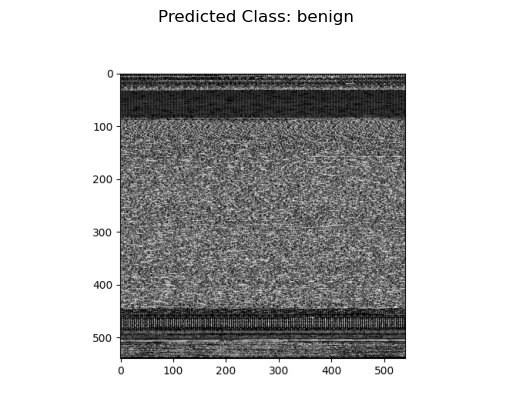

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Function to preprocess the external image
def preprocess_external_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Path to the external image you want to test
external_img_path = r"D:\Research-Final\Dataset-practical security analysis\images\Dataset\Val\Benign\hbenign\182867.exe.png"

# Preprocess the external image
processed_img = preprocess_external_image(external_img_path)

# Load the saved model
model = tf.keras.models.load_model('D:\Research-Final\Output.keras')

# Perform prediction on the external image
prediction = model.predict(processed_img)
print(prediction)
# Decode the predictionr
class_indices = {'0': 'benign', '1': 'malware'}
predicted_class = np.argmax(prediction)
predicted_class_name = class_indices[str(predicted_class)]

# Show the image and predicted class
plt.imshow(image.load_img(external_img_path))
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()